In [1]:
print("hello")

hello


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import sklearn

In [8]:
dataset=pd.read_csv("MaLL_Customers.csv")

In [9]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
dataset.shape

(200, 5)

In [13]:
#choosing the annual income column and spending score column

In [18]:
X=dataset.iloc[:,[3,4]].values #colon implies that we are taking column, if we don't use colon: that means we are takin 3,4 row

In [20]:
print(X)#in list it contain annual income and spending score, in x-axis we have annual income and in y we have spending score

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [21]:
#choosing number of clusters

In [22]:
"Wcss -> withing cluster sum of square"

'Wcss -> withing cluster sum of square'

In [23]:
#finiding WCSS value for different number of clusters

In [ ]:
wcss = []  # Initialize an empty list to store the WCSS (within-cluster sum of squares) for each value of k.

for i in range(1, 11):  # Loop through the range from 1 to 10 to test different numbers of clusters (k).
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)  # Create a KMeans object with 'i' clusters, using the 'k-means++' initialization method and a fixed random seed for reproducibility.
    kmeans.fit(X)  # Fit the KMeans algorithm to the dataset 'X' to compute the clusters.
    wcss.append(kmeans.inertia_)  # Append the inertia (WCSS value) of the current clustering to the wcss list.
		 # Print the current number of clusters being tested.
#here we are basically asking for the wcss value for different number of cluster between 1-10, which ever has the lowest wcss value, we will take that many number of cluster
    

In [34]:
#plot an elbow graph to find which cluster have the minimun wcss value

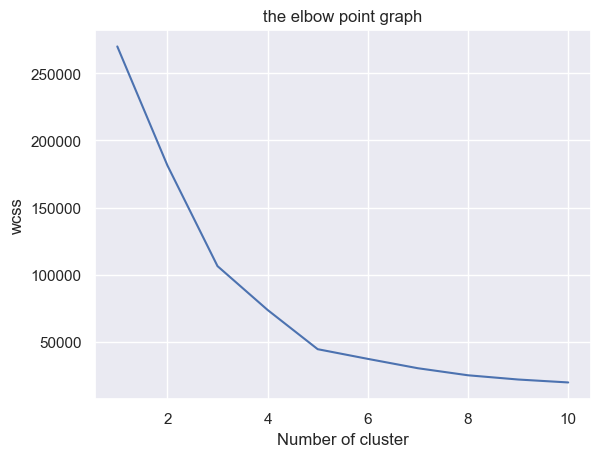

In [37]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title("the elbow point graph")
plt.xlabel("Number of cluster")
plt.ylabel("wcss")
plt.show()
#so here you can se we have 2 elbow points at 3 and 5 cluster , sudden drop, so we are goint to use 5 cluster as it's wcss value is too less

In [38]:
"optimum number of cluster will be 5"

'optimum number of cluster will be 5'

In [41]:
"now we have to train it, with number of cluster 5"
"training the kmeans clustering model"
kmeans1 = KMeans(n_clusters=5, init="k-means++", random_state=0)

In [42]:
kmeans1.fit(X)

d:\conda\envs\trainy2_O\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\conda\envs\trainy2_O\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [44]:
"return a label for each data point based on there cluster"
"each cluster will return a label, like first cluster label as 0 and so on"

'each cluster will return a label, like first cluster label as 0 and so on'

In [48]:
Y=kmeans1.predict(X)

In [49]:
print(Y)#different vlaues show different cluster label, as we have only 5 label so it showing only 0-4 cluster value

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [50]:
"visualizing all the cluster"

'visualizing all the cluster'

In [51]:
#plotting all the cluster and there centroid

ValueError: x and y must be the same size

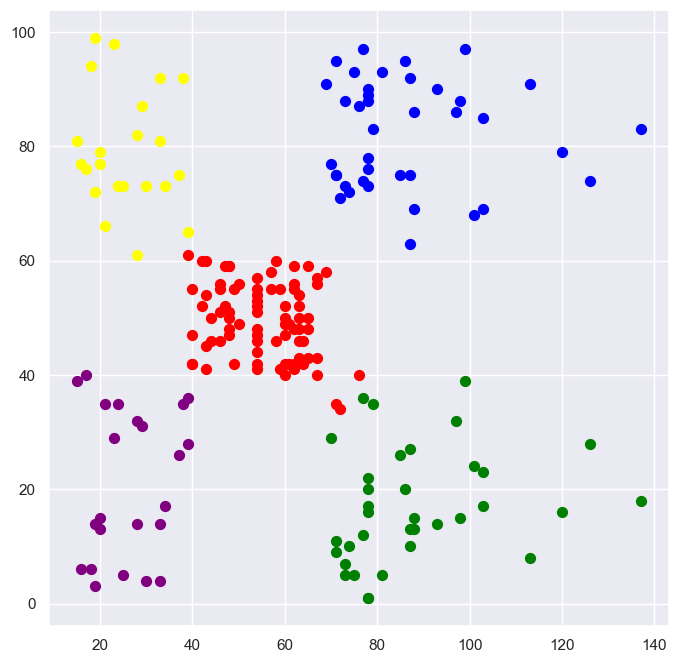

In [55]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c="green", label="Cluster 1")#X[Y==0,0],X[Y==0,1] now her the first 0 represent the cluster index number and 2nd 0 as x axis, while 3rd 0 as cluster index and 1 as y axis
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c="red", label="Cluster 2")
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c="blue", label="Cluster 3")
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c="yellow", label="Cluster 4")
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c="purple", label="Cluster 5")

#X[Y=="cluster index number","1st column,X axis"],X[Y=="cluster index number", "2nd columnY axis"]
# here 1st column is annual income and 2nd column is spending score

#plot the centroids 
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:1], s=100,c="black", label="centroid")#here 0 represent x axis and 1 represent y axis
plt.title("customer cluster")
plt.xlabel("annual income")
plt.ylabel("spending score")
plt.show()

#s represent size of dots